## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import warnings

%matplotlib inline

## Importing Datasets

In [2]:
df = pd.read_csv('HousePrice.csv')
df_test = pd.read_csv('HousePriceTest.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing

### Remove Irrelavant Values

In [3]:
df.drop(columns='Id',inplace=True)

### Missing Values

<AxesSubplot:title={'center':'Missing Columns'}, ylabel='% missing'>

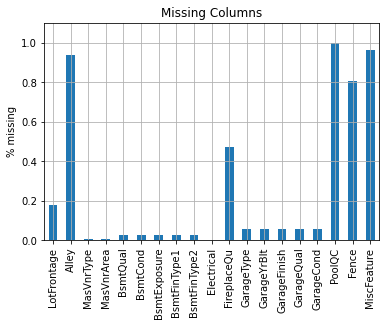

In [4]:
missing_values = df.isna().sum(axis=0)/df.shape[0]
missing_values = missing_values.loc[missing_values > 0]
missing_values.sort_values(ascending=True)
missing_values.plot( kind='bar',
                     title = 'Missing Columns',
                     ylabel = '% missing',
                     ylim = (0,1.1),
                     grid = True)

- Some Columns have an appreciable amount of missing values
- Let us do a feature-wise analysis

#### Columns with over 10% missing values

In [5]:
drop_columns = missing_values.loc[missing_values > 0.1].index
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
df['Alley'].unique()
## nan means none

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
df['FireplaceQu'].unique()
## nan means none

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [8]:
df['PoolQC'].unique()
## nan means none

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [9]:
df['Fence'].unique()
## nan means none

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [10]:
df['LotFrontage'].unique()
## nan means 0

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [11]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

#### Conclusion
- Most of the missing values in a column are representative of the particular feature not being present in the house.
- These do not count towards missing values, rather a 'None' value will suffice.
- Except MiscFeatures which has too many missing values, we will remove this.
- Features with less than 10% will be imputed using KNNImputer for Categorical/Ordinal & SimpleImputer for Numerical

In [12]:
fill_na_columns = drop_columns.delete([0,-1])
fill_na_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence'], dtype='object')

In [13]:
for feature in fill_na_columns:
    df.loc[:,feature].fillna(value='None',inplace=True)

In [14]:
df.loc[:,'LotFrontage'].fillna(value=0 , inplace=True)

In [15]:
df.drop(columns='MiscFeature',inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Split Columns into Ordinal, Categorical and Numerical Manually

In [17]:
numeric_cols = list(df.select_dtypes(exclude='object'))
ordinal_cols = ['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','KitchenQual','BsmtQual','BsmtCond','ExterQual','ExterCond','Condition1','Condition2']
nominal_cols = list(set(df.columns) - set(ordinal_cols) - set(numeric_cols))
numeric_cols.remove('SalePrice')

## Creating Pipelines

### Encoders & Imputers

In [18]:
ordinal_pipeline = Pipeline([
    ('imputer_o' , SimpleImputer(strategy='most_frequent')),
    ('encoder_o', OneHotEncoder(sparse=True, handle_unknown="ignore")) 
])

nominal_pipeline = Pipeline([
    ('imputer_n' , SimpleImputer(strategy='most_frequent')),
    ('encoder_n', OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ('imputer_nu' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### Transform Columns

In [19]:
preprocessing_pipeline = ColumnTransformer([
    ('nominal_preprocessor', nominal_pipeline, nominal_cols),
    ('ordinal_preprocessor', ordinal_pipeline, ordinal_cols),
    ('numerical_preprocessor', numerical_pipeline, numeric_cols)
])

### Model Training Pipeline

#### Lasso Regression

In [45]:
lasso_model = Pipeline([
    ("preprocessor",preprocessing_pipeline),
    ("lasso_regression",Lasso(tol = 0.001 , max_iter=1e7, precompute=True,random_state=42))
])

#### Ridge Regression

In [40]:
ridge_model = Pipeline([
    ("preprocessor",preprocessing_pipeline),
    ("ridge_regression",Ridge(max_iter=1e7 , random_state=42))
])

#### Linear Regression

In [41]:
linear_model = Pipeline([
    ("preprocessor",preprocessing_pipeline),
    ("linear_regression" ,LinearRegression())
])

### Train Test Split

In [42]:
X = df[nominal_cols+ordinal_cols+numeric_cols]
y = df['SalePrice']

In [43]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.3 , random_state=42)

In [33]:
y_train.head()

135     174000
1452    145000
762     215200
932     320000
435     212000
Name: SalePrice, dtype: int64

## Model Fitting

In [34]:
cross_val = KFold(n_splits = 10)
scores_ridge = cross_val_score(ridge_model, X = X_train , y = y_train , cv = cross_val)
scores_ridge.mean()
print("Ridge Regression Fitted With Accuracy : {0:.2f} ".format(scores_ridge.mean()))

Ridge Regression Fitted With Accuracy : 0.79 


In [35]:
cross_val = KFold(n_splits = 10)
scores_linear = cross_val_score(linear_model, X = X_train , y = y_train , cv = cross_val)
scores_linear.mean()
print("Linear Regression Fitted With Accuracy : {0:.2f} ".format(scores_linear.mean()))

Linear Regression Fitted With Accuracy : 0.59 


In [46]:
cross_val = KFold(n_splits = 10)
scores_lasso = cross_val_score(lasso_model, X = X_train , y = y_train , cv = cross_val)
scores_lasso.mean()
print("Lasso Regression Fitted With Accuracy : {0:.2f} ".format(scores_lasso.mean()))

Lasso Regression Fitted With Accuracy : 0.73 


### Model Evaluation

In [47]:
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.8805696237754916

In [48]:
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.3524438162260708

In [49]:
lasso_model.fit(X_train,y_train)
lasso_model.score(X_test,y_test)

0.6667697950065641

## Conclusion
### Ridge Regression
- Performed best with the highest test set accuracy of over 88.05%
### Lasso Regression
- Ended up Over Fitting the Dataset with a 8% lower test set accuracy
### Linear Regression
- Terribly Overfitted the Model  
  
    
    It Is Obvious that given the HUGE number of features, Linear Regression was severely prone to overfitting. This overfitting was somewhat reduced but not completely fixed by lasso regression which applied the l1 penalty on all our features.  
    Finally, Ridge Regression completely overcame the problem of overfitting by applying the l2 penalty on our feature set and emerged as the best performing model